In [1]:
#Amanda Studnicki
#KMeans Algorithm 
#Note -- I worked on this script after meeting with Dr. Fang in office hours 2/12/19.
#The general approach is to create a matrix of "assignments" that is (nx1) in size.
#By looping through each pixel, I find the distance to the featureset of the pixel and 
#a mode. As soon as the distance is less than the hard-coded radius, I break out of the loop
#that is looking for modes. Then, I move onto the next pixel. This is good, now I have 
#a nx1 matrix of assignments to different modes. Next, I would somehow group these pixels
#assigned to each mode, calculate the new mode's featureset by taking the mean of the featuresets
#assigned to that mode. Then, I would repeat this process with the new modes. Unfortunately,
#I ran out of time with this assignment and was unable to finish this script. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
import cv2
import statistics
import random
import math
from skimage import io, color
from skimage import exposure 

(280, 423, 3)
(10000, 3)


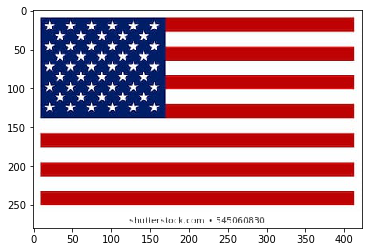

In [15]:
#read the image 
img = io.imread('american flag.jpg')
print(img.shape)
plt.imshow(img)

#only part of an image
img = img[:100,:100]

img_rows = img.shape[0]
img_colmns = img.shape[1]

#reshape the image
img_reshaped = img.reshape(-1,3)
print(img_reshaped.shape)

In [46]:
#MAIN SCRIPT----------------------
import time
start = time.time()
pixels = img_reshaped.shape[0]
features = img_reshaped.shape[1]

#Define distance function calculation-------------------
#returns distance between pixel and mode 
def distance(pixels,mode):
    distance = np.sqrt(np.sum((np.subtract(pixels,mode))**2)) 
    return distance 
#------------------------------------------------------

radius = 10 #hard code the radius

#initialize the modes as the number of pixels (meaning each data point is a potential mode)
modes = img_reshaped
number_of_modes = modes.shape[0]

#create an "assignment" matrix which assigns pixel data points to modes 
assignment = np.zeros((pixels,1))
for i in range(pixels):
    featureset = img_reshaped[i]
    for j in range(number_of_modes):
        mode = modes[j]
        dist = distance(featureset,mode) #calculate distance between pixel and given mode 
        if dist < radius:
            assignment[i] = j
            break #break out of loop as soon as pixel is within radius of a mode
            

end = time.time()
print('time elapsed: ', end - start)

time elapsed:  19.419410467147827
